# Capstone Project
##### This Notebook will be used for developing the Capstone Project for IBM Data Science Specialization final course on Coursera

In [1]:
import pandas as pd
import numpy as np
import requests 
from bs4 import BeautifulSoup
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


## 1. Datasets Collection and Cleaning

### _Dataset containing Tuscany's Municipalities, Provinces, their Population and Area Extension_

This Dataset is available from wikipedia.org, where information is reported in a table, which can be easily converted into a pandas _dataframe_.

In [3]:
html_data = requests.get('https://it.wikipedia.org/wiki/Comuni_della_Toscana').text
soup = BeautifulSoup(html_data, 'html.parser')
tables = soup.find_all(name='table', class_='wikitable sortable')

#initializing dataframe
tuscany_areas = pd.DataFrame(columns=['Municipality', 'Province', 'Population', 'Area (km2)'])

#building dataframe with data from wikipedia table
for row in tables[0].tbody.find_all('tr'):
    col = row.find_all('td')
    if col != []:
        municipality = col[0].text.strip('\n')
        province = col[1].text.strip('\n')
        population = col[2].text.strip('\n')
        population = population.replace(u'\xa0', u'') #replacing unrecognized characters
        population = population.replace(' ', '')
        population = population.replace('[1]', '') #replacing unwanted characters
        area = col[3].text.strip('\n')
        area = area.replace(',', '.')
        tuscany_areas = tuscany_areas.append({'Municipality': municipality, 'Province': province,
                                                             'Population': population, 'Area (km2)': area}, 
                                            ignore_index=True)

tuscany_areas.head()

,Municipality,Province,Population,Area (km2)
0,Abbadia San Salvatore,Siena,6513,58.90
1,Abetone Cutigliano,Pistoia,2109,74.94
2,Agliana,Pistoia,17469,11.00
3,Altopascio,Lucca,15444,28.70
4,Anghiari,Arezzo,5657,130.40


In [4]:
print(tuscany_areas.dtypes)
#We need to change population and area datatypes

tuscany_areas['Population'] = tuscany_areas['Population'].astype(int)
tuscany_areas['Area (km2)'] = tuscany_areas['Area (km2)'].astype(float)

print(tuscany_areas.dtypes)

Municipality    object
Province        object
Population      object
Area (km2)      object
dtype: object
Municipality     object
Province         object
Population        int64
Area (km2)      float64
dtype: object


I am interested in Provinces' Global Data, so I would perform a groupby operation.

In [5]:
tuscany_grouped = tuscany_areas.groupby(['Province']).sum()

#Adding a column for population density relative to every Province
tuscany_grouped['Population Density'] = tuscany_grouped['Population']/tuscany_grouped['Area (km2)']

tuscany_grouped.head()


,Population,Area (km2),Population Density
Province,,,
Arezzo,346587,3234.77,107.144248
Firenze,1009502,3504.33,288.072756
Grosseto,224649,4427.79,50.736146
Livorno,340086,1207.09,281.740384
Lucca,393516,1745.97,225.385316


### _Dataset containing COVID-19 information_

This Dataset is daily updated, and it could be automatically updated every day, but it is not recommended to download it too frequently, because it would prevent the user from downloading the file in the future.

In [6]:
!wget -O covidars.csv "http://dati.toscana.it/dataset/843000c5-8d28-4426-bed3-54703399be06/resource/c472c0cb-4105-43b9-ae38-d66b88dc0107/download/covidars.csv"

--2021-03-21 09:37:31--  http://dati.toscana.it/dataset/843000c5-8d28-4426-bed3-54703399be06/resource/c472c0cb-4105-43b9-ae38-d66b88dc0107/download/covidars.csv
Risoluzione di dati.toscana.it (dati.toscana.it)... 159.213.233.207
Connessione a dati.toscana.it (dati.toscana.it)|159.213.233.207|:80... connesso.
Richiesta HTTP inviata, in attesa di risposta... 200 OK
Lunghezza: 338038 (330K) [text/csv]
Salvataggio in: «covidars.csv»

covidars.csv        100%[===================>] 330,12K  --.-KB/s    in 0,07s   

2021-03-21 09:37:31 (4,60 MB/s) - «covidars.csv» salvato [338038/338038]



In [7]:
#covidars.csv has an invalid separator = '|', so I would replace '|' with ','
with open('covidars.csv', 'r') as file:
    filedata = file.read()

filedata = filedata.replace('|', ',')

with open('covidars.csv', 'w') as file:
    file.write(filedata)

file.close()

covid_data = pd.read_csv('covidars.csv')
covid_data.tail(10)

,geografia,giorno,data,totale_casi_positivi,totale_casi_positivi_ab,deceduti,deceduti_inc,letalita,totale_ricoveri,totale_ricoveri_inc,attualmente_positivi,dimessi,tamponi,tamponi_inc
5464,LU,390,20/3/2021,18767,49.058537,478.0,0.209644,2.547024,NaN,NaN,NaN,NaN,NaN,NaN
5465,MS,390,20/3/2021,10878,56.749354,480.0,0.628931,4.412576,NaN,NaN,NaN,NaN,NaN,NaN
5466,PI,390,20/3/2021,22901,54.771096,571.0,0.351494,2.493341,NaN,NaN,NaN,NaN,NaN,NaN
5467,PO,390,20/3/2021,15617,60.749281,376.0,0.534759,2.407633,NaN,NaN,NaN,NaN,NaN,NaN
5468,PT,390,20/3/2021,17253,59.146992,424.0,0.712589,2.457544,NaN,NaN,NaN,NaN,NaN,NaN
5469,SI,390,20/3/2021,9791,36.922230,217.0,0.462963,2.216321,NaN,NaN,NaN,NaN,NaN,NaN
5470,Toscana,390,20/3/2021,180998,NaN,5059.0,0.357072,NaN,1664.0,-1.770956,26051.0,149888.0,2754816.0,0.568882
5471,aslCENTRO,390,20/3/2021,81433,NaN,2453.0,0.327198,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5472,aslNO,390,20/3/2021,66153,NaN,1878.0,0.374131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5473,aslSE,390,20/3/2021,32857,NaN,658.0,0.458015,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#remove unwanted columns 
covid_data.drop(['giorno', 'totale_casi_positivi_ab', 'deceduti', 'deceduti_inc', 'totale_ricoveri_inc', 
                 'dimessi', 'tamponi_inc', 'totale_ricoveri', 'attualmente_positivi', 'tamponi'], 
                axis=1, inplace=True)

#remove unwanted rows
covid_data.drop(covid_data[covid_data['geografia'] == 'aslCENTRO'].index, inplace=True)
covid_data.drop(covid_data[covid_data['geografia'] == 'aslNO'].index, inplace=True)
covid_data.drop(covid_data[covid_data['geografia'] == 'aslSE'].index, inplace=True)
covid_data.drop(covid_data[covid_data['geografia'] == 'Toscana'].index, inplace=True)
covid_data.reset_index(drop=True, inplace=True)
covid_data.tail()

,geografia,data,totale_casi_positivi,letalita
3905,MS,20/3/2021,10878,4.412576
3906,PI,20/3/2021,22901,2.493341
3907,PO,20/3/2021,15617,2.407633
3908,PT,20/3/2021,17253,2.457544
3909,SI,20/3/2021,9791,2.216321


In [9]:
#Adding provinces' name instead of their two-letter code
province_codes = {'MS': 'Massa-Carrara', 'PI':'Pisa', 'PT':'Pistoia', 'SI' : 'Siena', 'FI':'Firenze', 'AR':'Arezzo', 
                 'LI':'Livorno', 'GR':'Grosseto', 'PO':'Prato', 'LU':'Lucca'}
codes = []
for code in covid_data['geografia']:
    code = province_codes[code]
    codes.append(code)
    
#checking shape correspondance before adding it to the dataframe
print(len(codes))
print(covid_data.shape)

covid_data['Province'] = pd.DataFrame(codes)
    
covid_data.tail()

3910
(3910, 4)


,geografia,data,totale_casi_positivi,letalita,Province
3905,MS,20/3/2021,10878,4.412576,Massa-Carrara
3906,PI,20/3/2021,22901,2.493341,Pisa
3907,PO,20/3/2021,15617,2.407633,Prato
3908,PT,20/3/2021,17253,2.457544,Pistoia
3909,SI,20/3/2021,9791,2.216321,Siena


In [10]:
#remove NaN objects and original 'geografia' column
covid_data.drop('geografia', 1, inplace=True)
covid_data.dropna(axis=0, inplace=True)
covid_data.reset_index(drop=True, inplace=True)

#renaming columns
covid_data.columns=['Date', 'Total Positives', 'Lethality', 'Province']
covid_data.head()

,Date,Total Positives,Lethality,Province
0,09/3/2020,12,0.0,Arezzo
1,09/3/2020,51,0.0,Firenze
2,09/3/2020,6,0.0,Grosseto
3,09/3/2020,10,0.0,Livorno
4,09/3/2020,31,0.0,Lucca


At this point, to group Provinces as done in the previous Dataset, I should perform different operations in the 'Total Positives' and 'Lethality' columns. For this reason, I will split this _dataframe_ and then merge it back together with the updated values.

- __Total Positives__ is a column where values are updated by Province, as a sum of the previous row with the new infected people. So, it is reasonable to take the max of this column as the total number of infected people.

- __Lethality__ column reports the lethality index based on the casualities among the people that got infected with the virus. Therefore, it should be appropriate to calculate the average of the lethality index by Province.

In [11]:
covid_totpos = covid_data[['Total Positives', 'Province']]
covid_totpos_grouped = covid_totpos.groupby(['Province']).max()
covid_totpos_grouped.head()

,Total Positives
Province,
Arezzo,16668
Firenze,48563
Grosseto,6398
Livorno,13607
Lucca,18767


In [12]:
covid_lethal = covid_data[['Lethality', 'Province']]
covid_lethal_grouped = covid_lethal.groupby(['Province']).mean()
covid_lethal_grouped.head()

,Lethality
Province,
Arezzo,3.901600
Firenze,7.146323
Grosseto,3.478024
Livorno,6.946742
Lucca,6.313698


In [13]:
#Merging the two dataframes with updated values
covid_merged = covid_totpos_grouped
covid_merged = covid_merged.join(covid_lethal_grouped['Lethality'], on='Province')
covid_merged.head()

,Total Positives,Lethality
Province,,
Arezzo,16668,3.901600
Firenze,48563,7.146323
Grosseto,6398,3.478024
Livorno,13607,6.946742
Lucca,18767,6.313698


### _Dataset reporting Old Age Index_

The Old Age Index is an important index since the old age is a COVID-19 risk strongly associated factor, so it has to be taken into account. 

It was reported as:

    Old Age Index = (over-65 inhabitants / 0-14 old inhabitants) * 100

In [14]:
pop_indexes = pd.read_excel("Popolazione_indicatori_2019.xlsx")
pop_indexes.head()

,INDICATORI DI STRUTTURA- POPOLAZIONE TOTALE (MASCHI E FEMMINE) AL 31.12.19,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,PROVINCE,Indice di Vecchiaia(1),Indice di Dipendenza totale(2),Indice di Dipendenza anziani(3),Indice di Dipendenza bambini(4),Indice di Ricambio(5),Indice di Ricambio totale(6),Pop. attiva(7),pop65+,pop0-14,pop15-64,pop60-64,pop15-19


In [15]:
#setting indexes and columns
pop_indexes.columns = pop_indexes.loc[4]
pop_indexes = pop_indexes[6:]
pop_index = pop_indexes[['PROVINCE', 'Indice di Vecchiaia(1)']]
pop_index.columns = ['Province', 'Old Age Index']
pop_index.reset_index(drop=True, inplace=True)
pop_index.tail()

,Province,Old Age Index
18,Indice di Dipendenza anziani=(Pop.65+/Pop.15-6...,NaN
19,Indice di Dipendenza bambini=(Pop.0-14/Pop.15-...,NaN
20,Indice di Ricambio della popolazione attiva=(P...,NaN
21,Indice di Ricambio totale=(Pop.0-14/Pop.65+)*100,NaN
22,Pop. attiva=(Pop.15-19/Pop.60-64)*100,NaN


In [16]:
#dropping NaN values and unwanted values
pop_index.dropna(axis=0, inplace=True)
pop_index.drop(pop_index[pop_index['Province'] == 'Totale Toscana'].index, inplace=True)
pop_index.tail()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Province,Old Age Index
5,Massa-Carrara,248.68
6,Pisa,192.581
7,Pistoia,205.564
8,Prato,161.049
9,Siena,213.61


### _Dataset reporting Male inhabitants_

The Male Fraction of the inhabitants was considered because there are evidences that the sex is correlated with a higher risk factor to get infected with SARS-CoV-2 Virus.

In [17]:
male_data = pd.read_excel("Tavole_maschi_per_età_e_classi_età_31_12_2019.xls")
male_data

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 138,Unnamed: 139,Unnamed: 140,Unnamed: 141,Unnamed: 142,Unnamed: 143,Unnamed: 144,Unnamed: 145,Unnamed: 146,Unnamed: 147
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,POPOLAZIONE PER ETA' E CLASSI DI ETA' AL 31.1...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Province,ETA',NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Totale,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,...,6-10,11-13,14-17,18 e +,NaN,NaN,15-49,15-64,65 e +,75 e +
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,Arezzo,1141,1148.0,1281.0,1293.0,1303.0,1394.0,1460.0,1452.0,...,7513,4685,6182,140704,166644,NaN,69276,106399,38955,18826
6,NaN,Firenze,3389,3531.0,3723.0,3861.0,3952.0,4222.0,4216.0,4435.0,...,22375,14442,19111,402820,481426,NaN,200397,307588,109648,55140
7,NaN,Grosseto,591,733.0,695.0,776.0,758.0,748.0,796.0,864.0,...,4464,2984,3783,91253,106785,NaN,42446,67153,26931,12908
8,NaN,Livorno,960,1070.0,1116.0,1163.0,1209.0,1268.0,1295.0,1343.0,...,6993,4530,5837,136574,160720,NaN,64499,101650,39321,19352
9,NaN,Lucca,1179,1211.0,1344.0,1399.0,1424.0,1458.0,1539.0,1662.0,...,8276,5402,6994,159082,187769,NaN,76453,120492,43763,20933


In [18]:
#setting indexes
male_data.columns = male_data.loc[2]
male_data = male_data[['Province', 'Totale']]

#removing NaN values and unwanted columns
male_data.dropna(axis=0, inplace=True)
male_data.reset_index(drop=True, inplace=True)
male_data = male_data[1:]
male_data.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


2,Province,Totale,Totale,Totale,Totale
1,Arezzo,166644,166644,166644,166644
2,Firenze,481426,481426,481426,481426
3,Grosseto,106785,106785,106785,106785
4,Livorno,160720,160720,160720,160720
5,Lucca,187769,187769,187769,187769


In [19]:
#removing redundant columns 
male_data.columns = ['Province', 'Total Male', 'a', 'b', 'c']
male_data = male_data[['Province', 'Total Male']]
male_data.drop(male_data[male_data['Province'] == 'Totale Toscana'].index, inplace=True)
male_data.reset_index(drop=True, inplace=True)
male_data.head()

,Province,Total Male
0,Arezzo,166644
1,Firenze,481426
2,Grosseto,106785
3,Livorno,160720
4,Lucca,187769


### _Geographical Coordinates Dataset_

I have chosen to use another Dataset to get the precise latitude and longitude coordinates, since the Nominatim geolocator tool does not retrieve the proper values.     
In this case, I will transform publicly available tables from the following website into a single Dataframe.

In [20]:
#initializing dataframe
province_latlng = pd.DataFrame(columns=['Province', 'Latitude', 'Longitude'])

provinces = ['arezzo', 'firenze', 'grosseto', 'livorno', 'lucca', 'massa-carrara',
              'pisa', 'pistoia', 'prato', 'siena']

for province in provinces:
    html_data = requests.get('https://www.dossier.net/utilities/coordinate-geografiche/provincia-'+province+'.htm').text
    soup = BeautifulSoup(html_data, 'html.parser')
    table = soup.find_all(name='table', class_='tabella')

    #building dataframe with data from wikipedia table
    for row in table[0].find_all('tr'):
        col = row.find_all('td')
        if col != []:
            municipality = col[0].text
            latitude = col[1].text
            longitude = col[2].text
            province_latlng = province_latlng.append({'Municipality': municipality, 'Latitude': latitude,
                                                             'Longitude': longitude}, 
                                                     ignore_index=True)
province_latlng.head()

,Province,Latitude,Longitude,Municipality
0,NaN,latitudine,longitudine,denominazione
1,NaN,43.5418888,12.0606481,Anghiari
2,NaN,43.4712011,11.8630617,Arezzo
3,NaN,43.7089577,12.1864914,Badia Tedalda
4,NaN,43.6975000,11.8145370,Bibbiena


In [21]:
#removing unwanted rows and columns
province_latlng.drop(province_latlng[province_latlng['Municipality'] == 'denominazione'].index, inplace=True)
province_latlng.drop('Province', axis=1, inplace=True)
province_latlng.reset_index(drop=True, inplace=True)


provinces_upper = ['Arezzo', 'Firenze', 'Grosseto', 'Livorno', 'Lucca', 'Massa-Carrara',
              'Pisa', 'Pistoia', 'Prato', 'Siena']

provinces_lat = []
provinces_lng = []
for province in provinces_upper:
    if province == 'Massa-Carrara':
        province_coord1 = province_latlng.loc[province_latlng['Municipality'] == 'Massa'][['Latitude']]
        province_coord2 = province_latlng.loc[province_latlng['Municipality'] == 'Massa'][['Longitude']]
        provinces_lat.append(province_coord1)
        provinces_lng.append(province_coord2)
        
    else:
        province_coord1 = province_latlng.loc[province_latlng['Municipality'] == province][['Latitude']]
        province_coord2 = province_latlng.loc[province_latlng['Municipality'] == province][['Longitude']]
        provinces_lat.append(province_coord1)
        provinces_lng.append(province_coord2)

print(provinces_lat, provinces_lng)

[     Latitude
1  43.4712011,       Latitude
53  43.7687324,       Latitude
93  42.7628597,        Latitude
119  43.5518760,        Latitude
147  43.8430139,        Latitude
175  44.0386917,        Latitude
208  43.7161350,        Latitude
236  43.9321551,        Latitude
248  43.8796987,        Latitude
282  43.3186614] [    Longitude
1  11.8630617,      Longitude
53  11.2569013,      Longitude
93  11.1127828,       Longitude
119  10.3080108,       Longitude
147  10.5079940,       Longitude
175  10.1441887,       Longitude
208  10.3966024,       Longitude
236  10.9185234,       Longitude
248  11.0963121,       Longitude
282  11.3305135]


Therefore, I will save these coordinates into the 2 following lists for simplicity.

In [22]:
provinces_lat = [43.4712011,43.7687324,42.7628597,43.5518760,43.8430139,44.0386917, 43.7161350,43.9321551, 
                43.8796987,43.3186614]
provinces_lng = [11.8630617, 11.2569013,11.1127828, 10.3080108,10.5079940, 10.1441887, 10.3966024, 10.9185234, 
                11.0963121, 11.3305135] 

### _Final DataFrame_

I will now merge all selected features into a single _dataframe_ that can be directly used for model building and further calculations. 

Moreover, to get a better understanding of the data, I will consider the male fraction and the total infected people fraction of the population. 

In [23]:
male_data.index = male_data['Province']
pop_index.index = pop_index['Province']
province_merged = covid_merged
province_merged = province_merged.join(male_data['Total Male'], on='Province')
province_merged = province_merged.join(pop_index['Old Age Index'], on='Province')
province_merged = province_merged.join(tuscany_grouped[['Population', 'Population Density']],
                                       on='Province')

#calculating the fractions
province_merged['Male Fraction'] = (province_merged['Total Male']/province_merged['Population'])*100
province_merged['Positives Fraction'] = (province_merged['Total Positives']/province_merged['Population'])*100
province_merged.drop(['Population', 'Total Male', 'Total Positives'], axis=1, inplace=True)
province_merged

,Lethality,Old Age Index,Population Density,Male Fraction,Positives Fraction
Province,,,,,
Arezzo,3.901600,211.187,107.144248,48.0814,4.809182
Firenze,7.146323,205.593,288.072756,47.6895,4.810590
Grosseto,3.478024,251.105,50.736146,47.5342,2.847998
Livorno,6.946742,233.98,281.740384,47.2586,4.001047
Lucca,6.313698,218.922,225.385316,47.7157,4.769056
Massa-Carrara,9.765643,248.68,173.588452,47.0306,5.452632
Pisa,5.701183,192.581,173.235272,48.7468,5.428501
Pistoia,6.982625,205.564,304.646505,48.4506,5.908056
Prato,5.332871,161.049,701.010295,49.2808,6.116087


In [24]:
#adjusting datatypes
print(province_merged.dtypes)
province_merged['Old Age Index'] = province_merged['Old Age Index'].astype(float)
province_merged['Male Fraction'] = province_merged['Male Fraction'].astype(float)
print(province_merged.dtypes)

Lethality             float64
Old Age Index          object
Population Density    float64
Male Fraction          object
Positives Fraction    float64
dtype: object
Lethality             float64
Old Age Index         float64
Population Density    float64
Male Fraction         float64
Positives Fraction    float64
dtype: object


## 2. Data Analysis

First of all, I will analyze the trend of infection in Siena (my hometown), Massa-Carrara (where the Lethality index was the highest of all) and Prato (where the Total Positive fraction was the most relevant).

#### __Siena__

Because data are extremely large in time, I would plot Total Positives over time updating the value every three days.

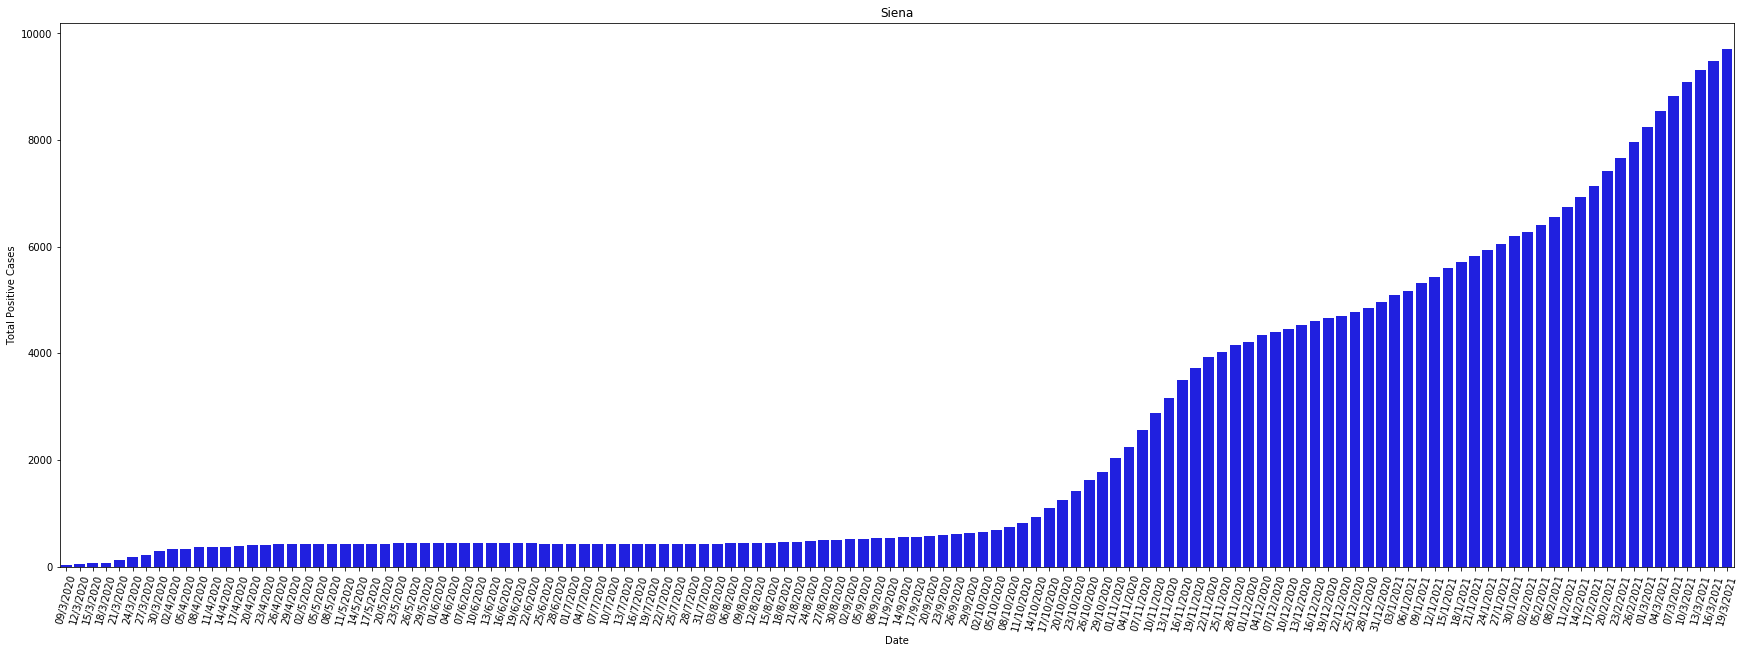

In [25]:
covid_siena = covid_data[covid_data['Province'] == 'Siena'].reset_index(drop=True)
covid_subset= covid_siena[::3]
fig, ax = plt.subplots(figsize=(30, 10))
g = sns.barplot(ax=ax, x='Date', y='Total Positives', color='blue', data=covid_subset)
plt.xticks(rotation=75)
plt.xlabel('Date')
plt.ylabel('Total Positive Cases')
plt.title('Siena')
plt.show()

##### I will also calculate the everyday new positives, to understand when most of the cases have arisen.

In [26]:
#calculating and appending the column with the new everyday cases to the COVID-19 Dataframe 
new_totals = []
i = 0
m = 1

total = covid_siena['Total Positives'].loc[i]
new_totals.append(total)

for total in list(covid_siena['Total Positives']):
    if m == covid_siena.shape[0]:
        break
    else:
        total = covid_siena['Total Positives'].loc[m] - covid_siena['Total Positives'].loc[i]
        new_totals.append(total)
    m+=1
    i+=1

covid_siena['New Positives'] = pd.DataFrame(new_totals)

covid_siena.head()

,Date,Total Positives,Lethality,Province,New Positives
0,09/3/2020,29,0.0,Siena,29
1,10/3/2020,33,0.0,Siena,4
2,11/3/2020,37,0.0,Siena,4
3,12/3/2020,41,0.0,Siena,4
4,13/3/2020,41,0.0,Siena,0


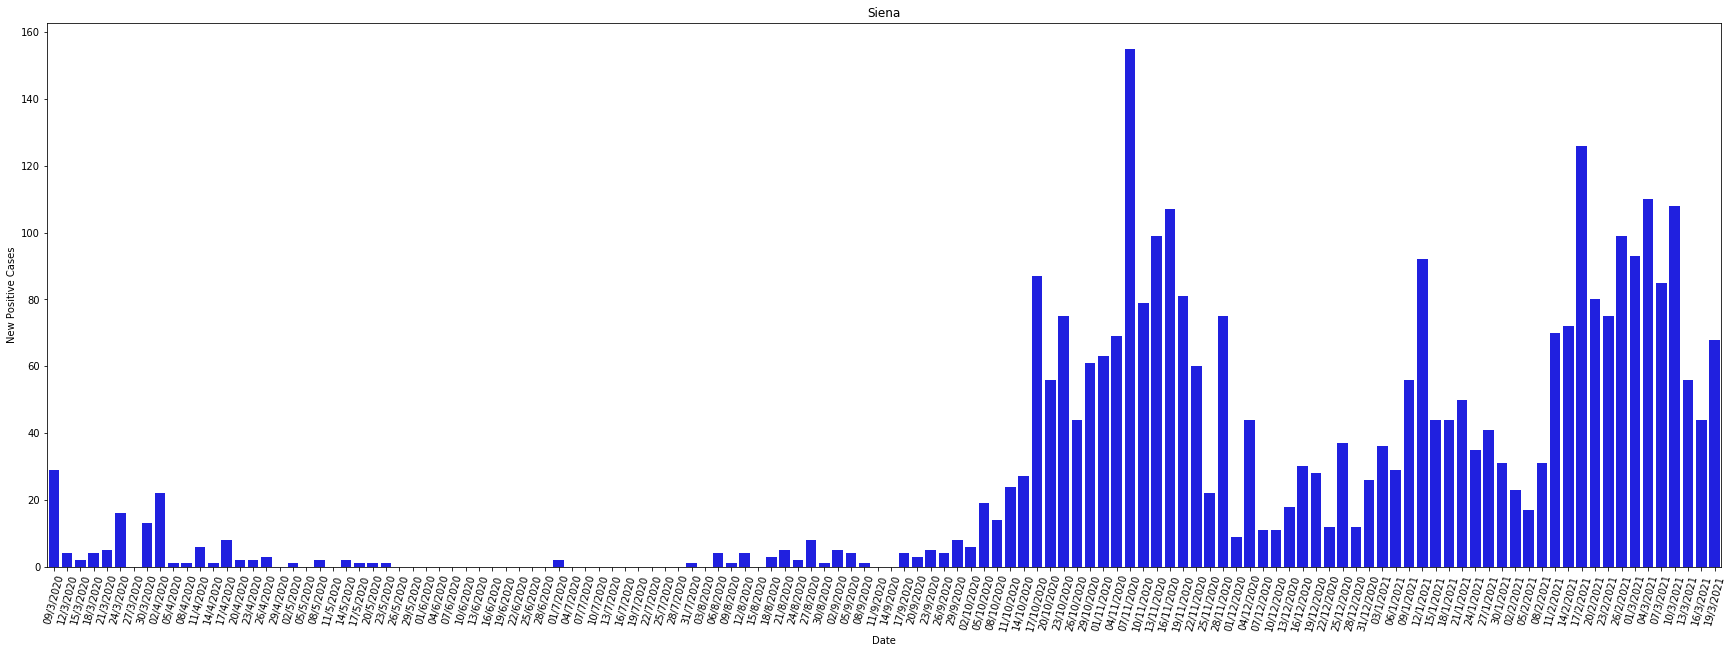

In [27]:
#still getting the new value every three days in the plot
covid_new_subset = covid_siena[::3]
fig, ax = plt.subplots(figsize=(30, 10))
g = sns.barplot(ax=ax, x='Date', y='New Positives', color='blue', data=covid_new_subset)
plt.xticks(rotation=75)
plt.xlabel('Date')
plt.ylabel('New Positive Cases')
plt.title('Siena')
plt.show()

##### Finally, I would plot the lethality over time.

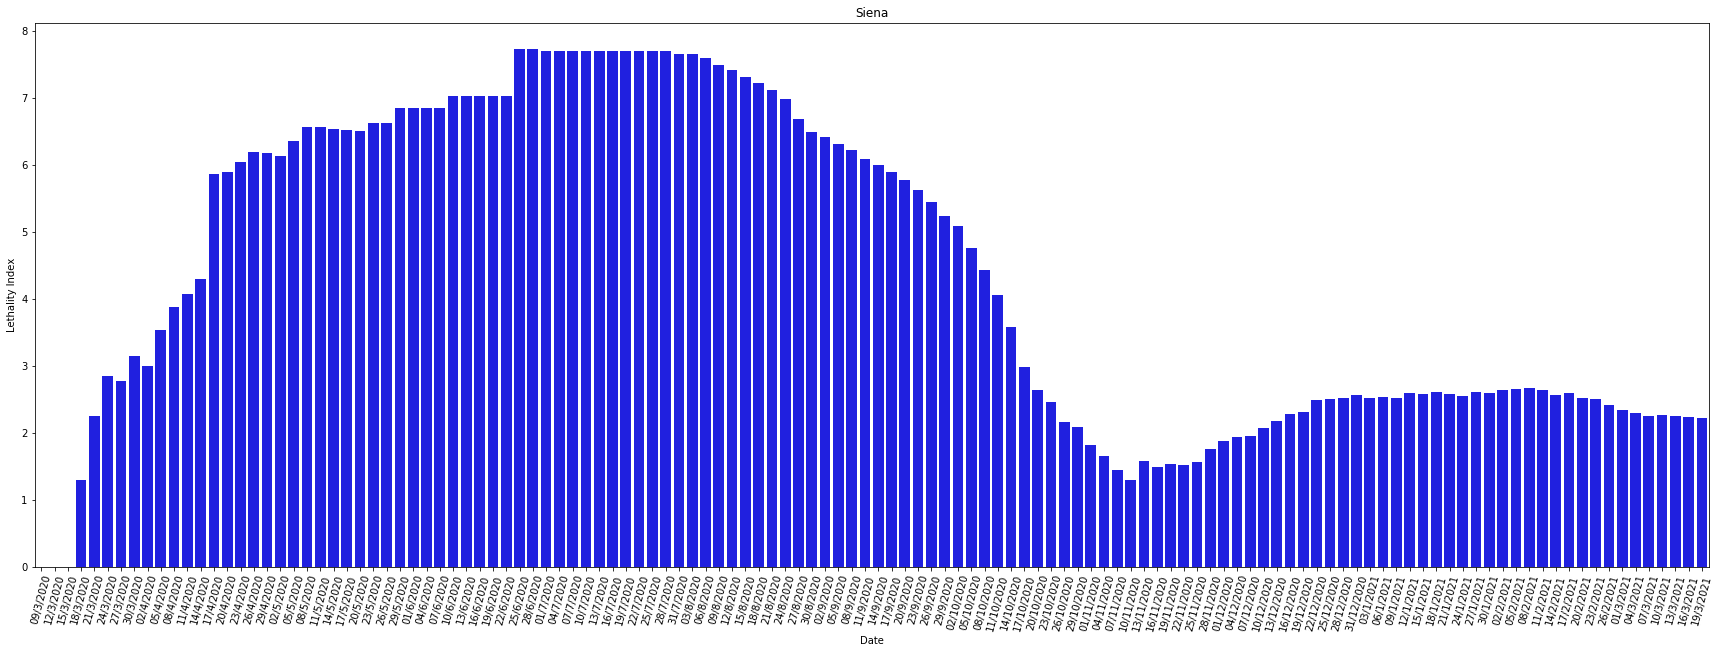

In [28]:
fig, ax = plt.subplots(figsize=(30, 10))
g = sns.barplot(ax=ax, x='Date', y='Lethality', color='blue', data=covid_new_subset)
plt.xticks(rotation=75)
plt.xlabel('Date')
plt.ylabel('Lethality Index')
plt.title('Siena')
plt.show()

#### __Massa-Carrara__

I will repeat the same analysis for Massa-Carrara. For further description, check the Report.

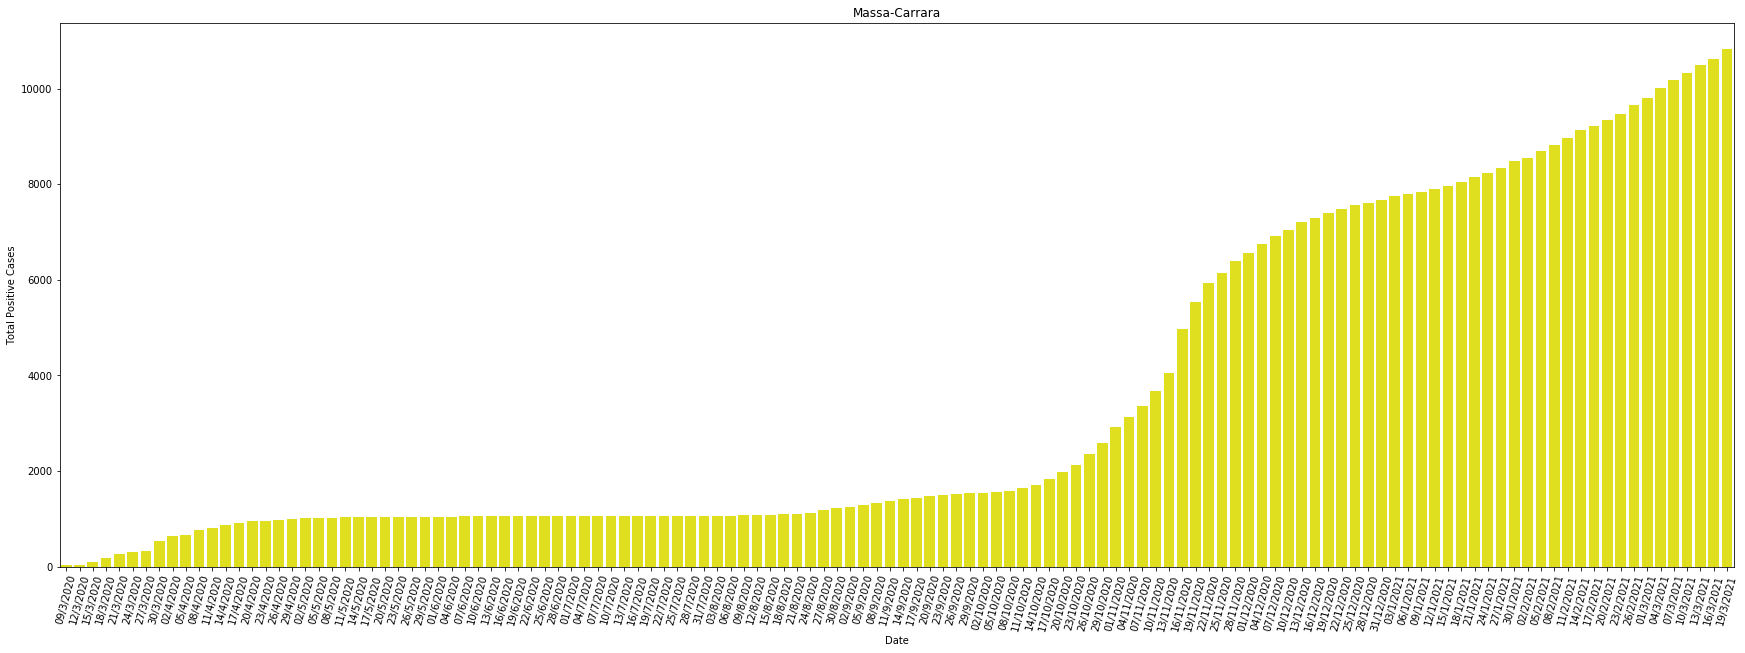

In [29]:
covid_mc = covid_data[covid_data['Province'] == 'Massa-Carrara'].reset_index(drop=True)
covid_subset_mc= covid_mc[::3]
fig, ax = plt.subplots(figsize=(30, 10))
g = sns.barplot(ax=ax, x='Date', y='Total Positives', color='yellow', data=covid_subset_mc)
plt.xticks(rotation=75)
plt.xlabel('Date')
plt.ylabel('Total Positive Cases')
plt.title('Massa-Carrara')
plt.show()

In [30]:
#calculating and appending the column with the new everyday cases to the COVID-19 Dataframe 
new_totals = []
i = 0
m = 1

total = covid_mc['Total Positives'].loc[i]
new_totals.append(total)

for total in list(covid_mc['Total Positives']):
    if m == covid_mc.shape[0]:
        break
    else:
        total = covid_mc['Total Positives'].loc[m] - covid_mc['Total Positives'].loc[i]
        new_totals.append(total)
    m+=1
    i+=1

covid_mc['New Positives'] = pd.DataFrame(new_totals)

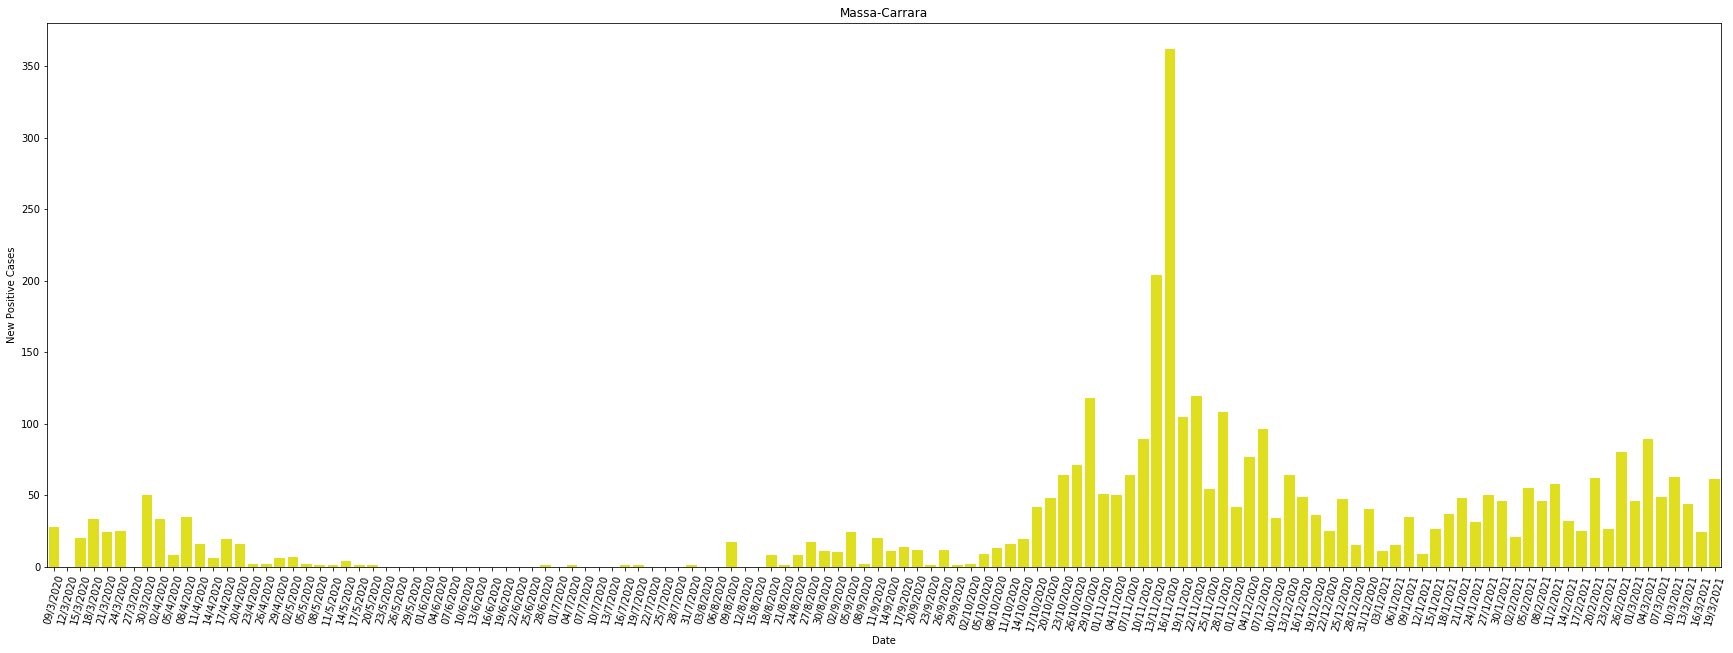

In [31]:
covid_new_subset_mc = covid_mc[::3]
fig, ax = plt.subplots(figsize=(30, 10))
g = sns.barplot(ax=ax, x='Date', y='New Positives', color='yellow', data=covid_new_subset_mc)
plt.xticks(rotation=75)
plt.xlabel('Date')
plt.ylabel('New Positive Cases')
plt.title('Massa-Carrara')
plt.show()

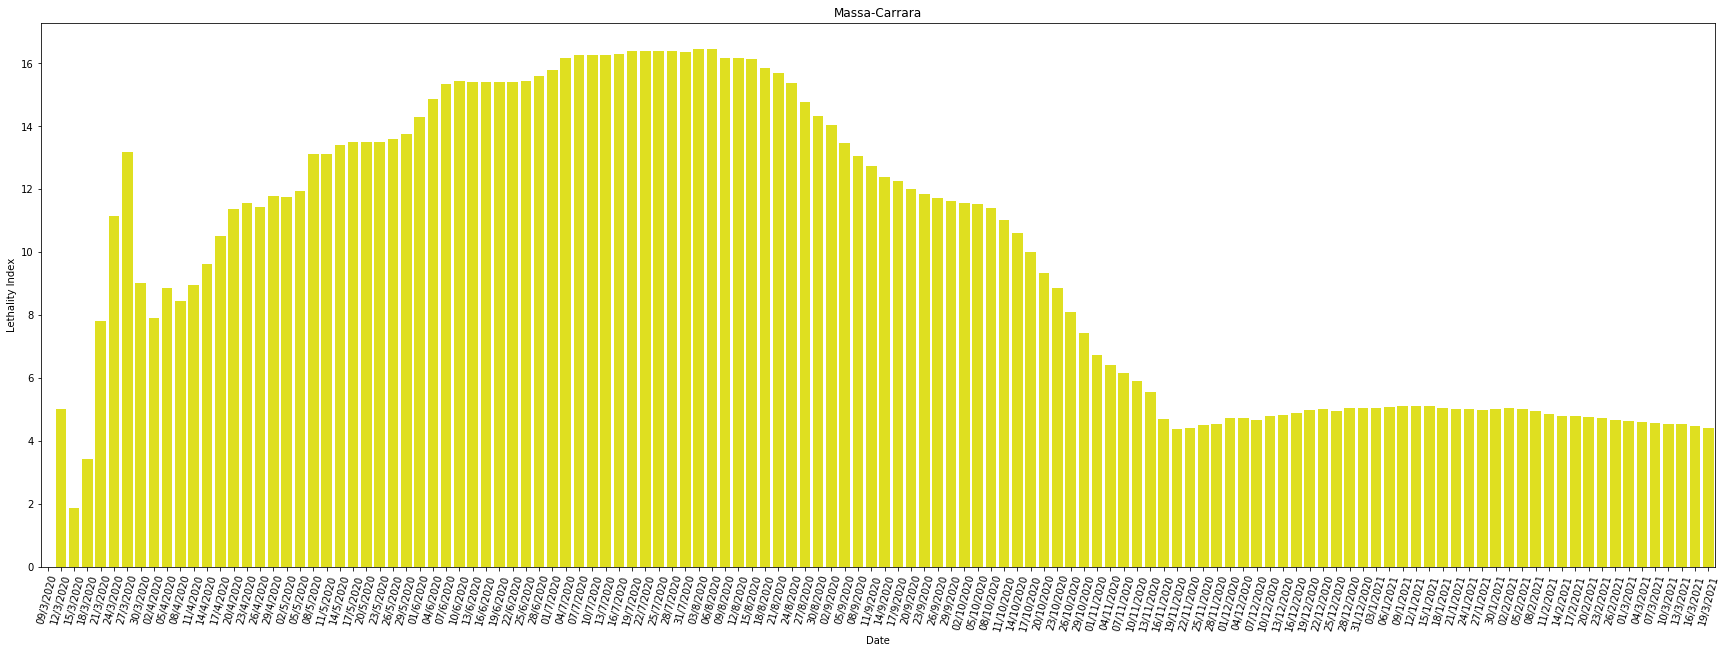

In [32]:
fig, ax = plt.subplots(figsize=(30, 10))
g = sns.barplot(ax=ax, x='Date', y='Lethality', color='yellow', data=covid_new_subset_mc)
plt.xticks(rotation=75)
plt.xlabel('Date')
plt.ylabel('Lethality Index')
plt.title('Massa-Carrara')
plt.show()

#### __Prato__

I will repeat the same analysis for Prato. For further description, check the Report.

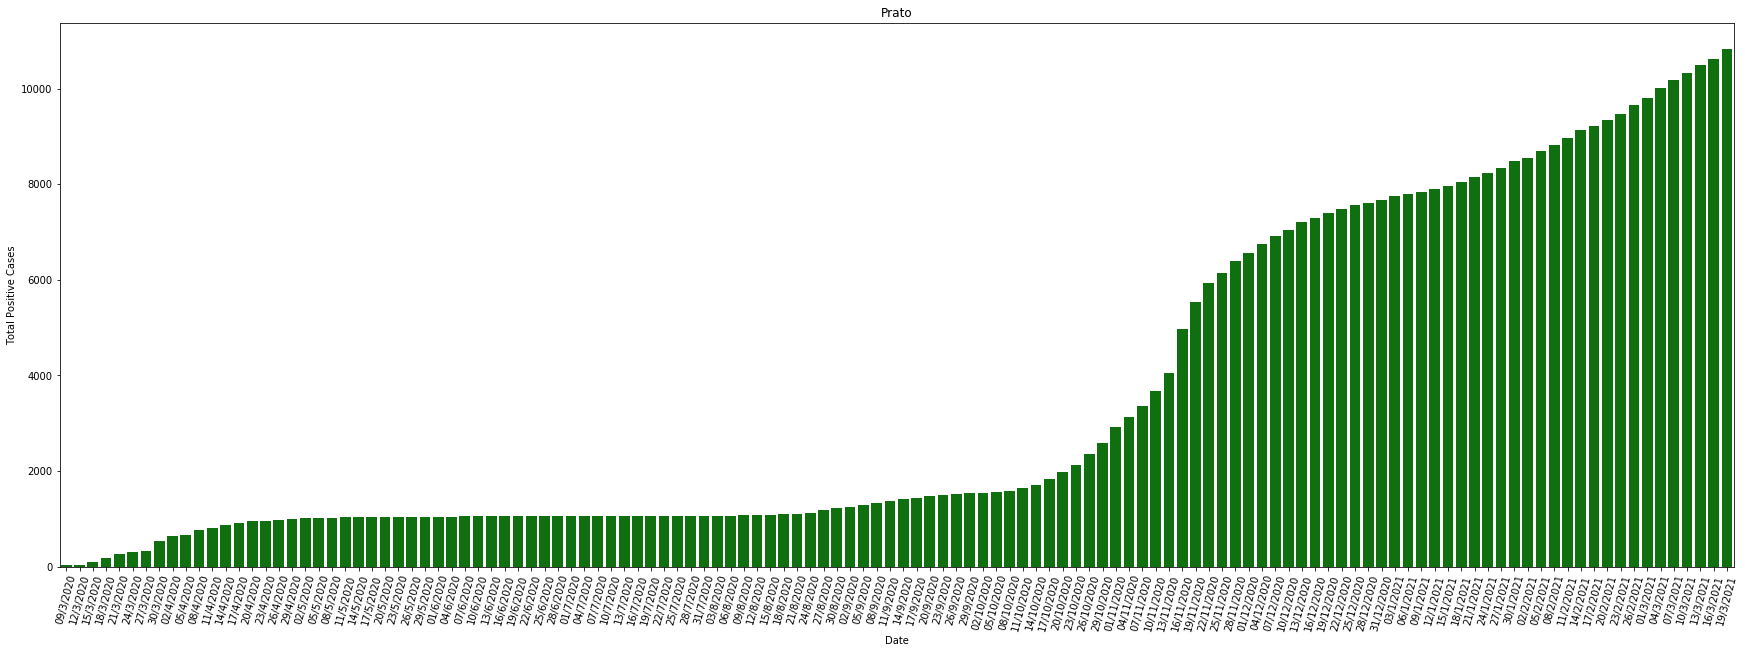

In [33]:
covid_po = covid_data[covid_data['Province'] == 'Prato'].reset_index(drop=True)
covid_subset_po= covid_mc[::3]
fig, ax = plt.subplots(figsize=(30, 10))
g = sns.barplot(ax=ax, x='Date', y='Total Positives', color='green', data=covid_subset_po)
plt.xticks(rotation=75)
plt.xlabel('Date')
plt.ylabel('Total Positive Cases')
plt.title('Prato')
plt.show()

In [34]:
#calculating and appending the column with the new everyday cases to the COVID-19 Dataframe 
new_totals = []
i = 0
m = 1

total = covid_po['Total Positives'].loc[i]
new_totals.append(total)

for total in list(covid_po['Total Positives']):
    if m == covid_po.shape[0]:
        break
    else:
        total = covid_po['Total Positives'].loc[m] - covid_po['Total Positives'].loc[i]
        new_totals.append(total)
    m+=1
    i+=1

covid_po['New Positives'] = pd.DataFrame(new_totals)

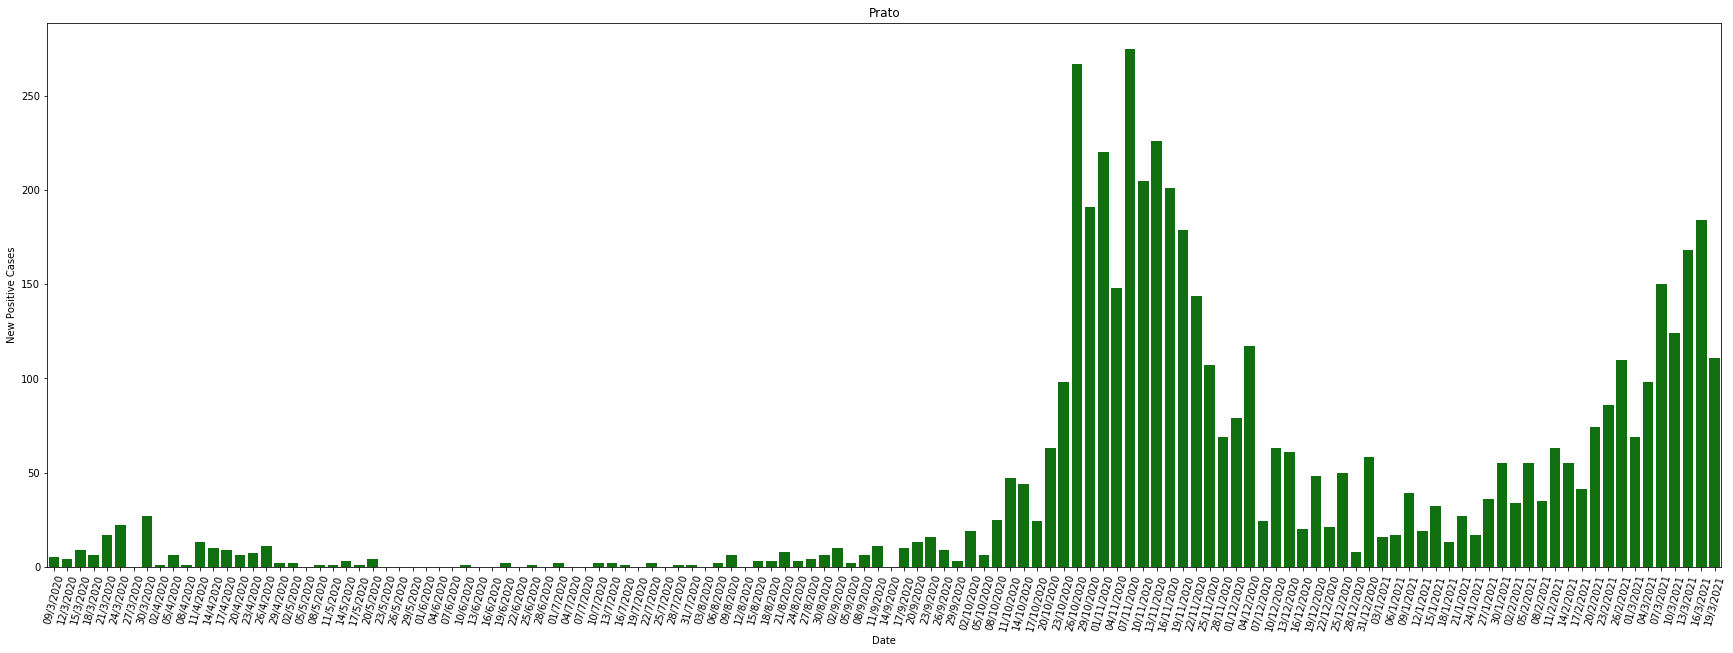

In [35]:
covid_new_subset_po = covid_po[::3]
fig, ax = plt.subplots(figsize=(30, 10))
g = sns.barplot(ax=ax, x='Date', y='New Positives', color='green', data=covid_new_subset_po)
plt.xticks(rotation=75)
plt.xlabel('Date')
plt.ylabel('New Positive Cases')
plt.title('Prato')
plt.show()

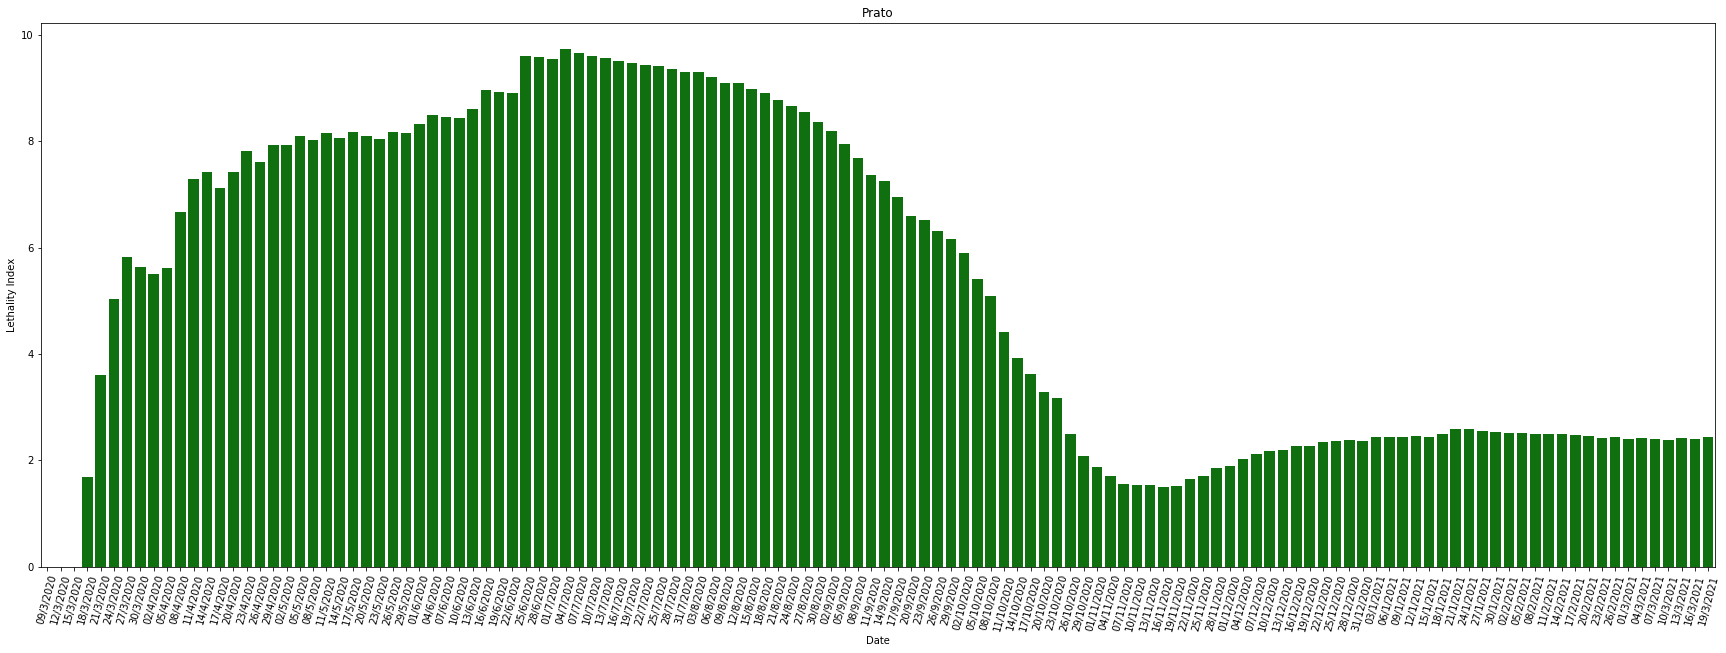

In [36]:
fig, ax = plt.subplots(figsize=(30, 10))
g = sns.barplot(ax=ax, x='Date', y='Lethality', color='green', data=covid_new_subset_po)
plt.xticks(rotation=75)
plt.xlabel('Date')
plt.ylabel('Lethality Index')
plt.title('Prato')
plt.show()

##### Now, we confront data for the three Provinces, on the basis of last daily new positives and lethality.

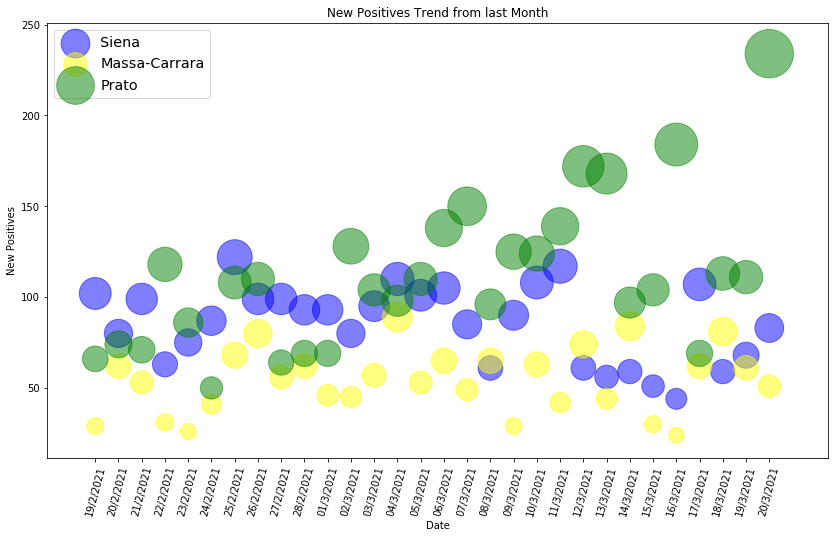

In [37]:
#confronting data from last month.
covid_confront_si = covid_siena.tail(30)
covid_confront_mc = covid_mc.tail(30)
covid_confront_po = covid_po.tail(30)

# Siena
ax0 = covid_confront_si.plot(kind='scatter',
                    x='Date',
                    y='New Positives',
                    figsize=(14, 8),
                    alpha=0.5,                 
                    color='blue',
                    s= covid_confront_si['New Positives'] * 10,  
                   )

# Massa-Carrara
ax1 = covid_confront_mc.plot(kind='scatter',
                    x='Date',
                    y='New Positives',
                    alpha=0.5,
                    color="yellow",
                    s= covid_confront_mc['New Positives'] * 10,
                    ax = ax0
                   )

# Prato
ax2 = covid_confront_po.plot(kind='scatter',
                    x='Date',
                    y='New Positives',
                    alpha=0.5,
                    color="green",
                    s= covid_confront_po['New Positives'] * 10,
                    ax = ax0
                   )

ax0.set_ylabel('New Positives')
plt.xticks(rotation = 75)
ax0.set_title('New Positives Trend from last Month')
ax0.legend(['Siena', 'Massa-Carrara', 'Prato'], loc='upper left', fontsize='x-large')

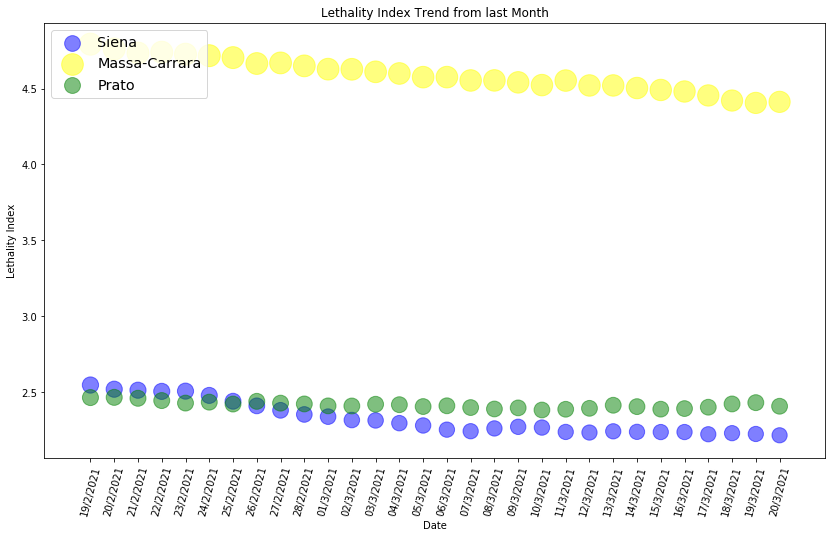

In [38]:
# Siena
ax0 = covid_confront_si.plot(kind='scatter',
                    x='Date',
                    y='Lethality',
                    figsize=(14, 8),
                    alpha=0.5,                 
                    color='blue',
                    s= covid_confront_si['Lethality'] * 100 + 10,  
                   )

# Massa-Carrara
ax1 = covid_confront_mc.plot(kind='scatter',
                    x='Date',
                    y='Lethality',
                    alpha=0.5,
                    color="yellow",
                    s= covid_confront_mc['Lethality'] * 100 + 10,
                    ax = ax0
                   )

# Prato
ax2 = covid_confront_po.plot(kind='scatter',
                    x='Date',
                    y='Lethality',
                    alpha=0.5,
                    color="green",
                    s= covid_confront_po['Lethality'] * 100 + 10,
                    ax = ax0
                   )

ax0.set_ylabel('Lethality Index')
plt.xticks(rotation = 75)
ax0.set_title('Lethality Index Trend from last Month')
ax0.legend(['Siena', 'Massa-Carrara', 'Prato'], loc='upper left', fontsize='x-large')

#### At this point, I would check the relationships between the features selected in the final Dataframe, thus describing the feature-associated risk of getting infected with the virus. 

Check the Report for the Description.

In [39]:
province_merged.corr()['Positives Fraction'].sort_values()

Old Age Index        -0.636132
Lethality             0.490763
Male Fraction         0.637767
Population Density    0.651351
Positives Fraction    1.000000
Name: Positives Fraction, dtype: float64

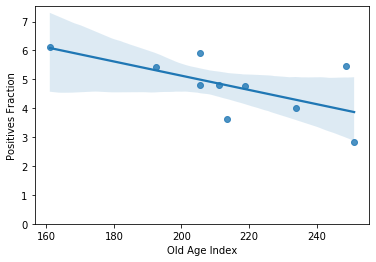

In [40]:
#Plotting Old Age Index against the Positives' Fraction
sns.regplot(x='Old Age Index', y='Positives Fraction', data=province_merged)
plt.ylim(0,)
plt.show()

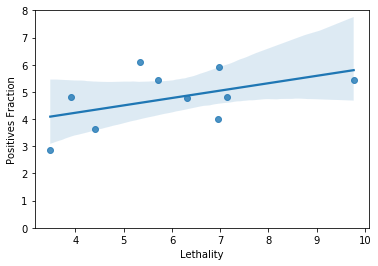

In [41]:
#Plotting Lethality against the Positives' Fraction
sns.regplot(x='Lethality', y='Positives Fraction', data=province_merged)
plt.ylim(0,)
plt.show()

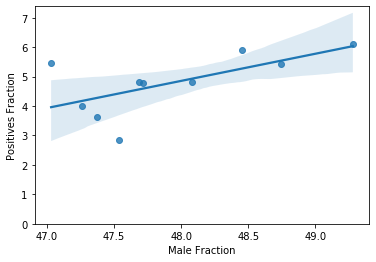

In [42]:
#Plotting Male fraction against the Positives' Fraction
sns.regplot(x='Male Fraction', y='Positives Fraction', data=province_merged)
plt.ylim(0,)
plt.show()

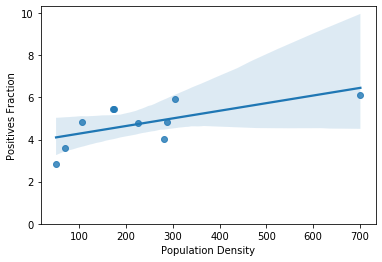

In [43]:
#Plotting Population Density against the Positives' Fraction
sns.regplot(x='Population Density', y='Positives Fraction', data=province_merged)
plt.ylim(0,)
plt.show()

On the contrary, if we choose Lethality as the target variable, features are less correlated with the risk, with the Positives' Fraction as the most relevant predictor.

In [44]:
province_merged.corr()['Lethality'].sort_values()

Male Fraction        -0.285520
Old Age Index         0.195937
Population Density    0.205636
Positives Fraction    0.490763
Lethality             1.000000
Name: Lethality, dtype: float64

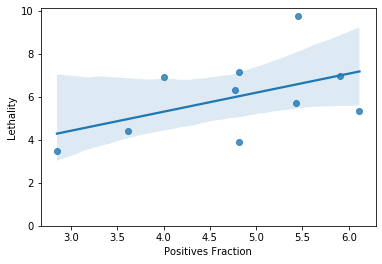

In [45]:
sns.regplot(x='Positives Fraction', y='Lethality', data=province_merged)
plt.ylim(0,)
plt.show()

## 3. The Demographic Model

In [46]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from scipy.spatial.distance import cdist
from sklearn import metrics
from sklearn.preprocessing import Normalizer
from geopy import Nominatim
import geocoder
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors

First of all, I will normalize the data as it comes from different Datasets. I will use the Normalizer tool from sci-kit learn because I think that it is the most appropriate among the available Scalers.

In [47]:
province_norm = Normalizer().fit_transform(province_merged)
province_norm

array([[0.01614078, 0.87367365, 0.443252  , 0.19891121, 0.01989542],
       [0.02000564, 0.5755433 , 0.80643982, 0.13350334, 0.01346691],
       [0.01334668, 0.96359876, 0.19469658, 0.18240914, 0.010929  ],
       [0.01880785, 0.63348525, 0.7627937 , 0.12794967, 0.01083257],
       [0.0198602 , 0.68863628, 0.70896588, 0.15009327, 0.01500141],
       [0.03179932, 0.80976374, 0.56524637, 0.15314304, 0.0177551 ],
       [0.02162018, 0.73031237, 0.65694738, 0.18485875, 0.0205861 ],
       [0.01883092, 0.55437141, 0.8215784 , 0.13066293, 0.01593299],
       [0.00739645, 0.2233676 , 0.97226977, 0.06835021, 0.00848274],
       [0.01913849, 0.9287874 , 0.30709819, 0.20598708, 0.01573919]])

Now, I would use the Elbow Method to display the best number of clusters to use, to estimate the optimum value for KMeans algorithm.

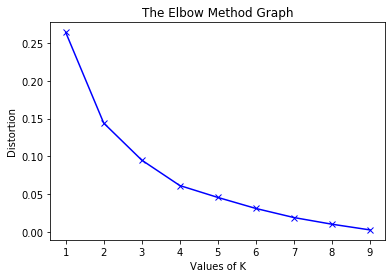

In [48]:
distortions = []
mapping = {}
K_list = range(1, 10)
 
for k in K_list:
    kmean_province = KMeans(n_clusters=k).fit(province_norm)
 
    distortions.append(sum(np.min(cdist(province_norm, kmean_province.cluster_centers_,
                                        'euclidean'), axis=1)) / province_norm.shape[0])
 
    mapping[k] = sum(np.min(cdist(province_norm, kmean_province.cluster_centers_,
                                   'euclidean'), axis=1)) / province_norm.shape[0]
plt.plot(K_list, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method Graph')
plt.show()

It seems that the best value would be __4__, since after that number we get an almost linear descending line.

In [49]:
k_clusters=4
kmeans_province = KMeans(n_clusters=k_clusters, random_state=42).fit(province_norm)
kmeans_province.labels_

array([0, 1, 0, 1, 2, 2, 2, 1, 3, 0], dtype=int32)

After building the model, we insert the labels into the dataframe for classification.

In [50]:
province_merged.insert(0, 'Cluster Labels', kmeans_province.labels_)
province_merged.reset_index(inplace=True)
province_merged.head()

,Province,Cluster Labels,Lethality,Old Age Index,Population Density,Male Fraction,Positives Fraction
0,Arezzo,0,3.901600,211.187104,107.144248,48.081434,4.809182
1,Firenze,1,7.146323,205.592951,288.072756,47.689455,4.810590
2,Grosseto,0,3.478024,251.105018,50.736146,47.534153,2.847998
3,Livorno,1,6.946742,233.979879,281.740384,47.258635,4.001047
4,Lucca,2,6.313698,218.922393,225.385316,47.715722,4.769056


At this point, we generate a map with the clutsers' labels.    
The Discussion of the outcome is presented in the Report.

In [51]:
geolocator = Nominatim(user_agent='foursquare_agent')
tuscany_location = geolocator.geocode('Tuscany, Italy')
tuscany_lat = tuscany_location.latitude
tuscany_lng = tuscany_location.longitude

map_clusters = folium.Map(location=[tuscany_lat, tuscany_lng], zoom_start=8)
x = np.arange(k_clusters)
ys = [i + x + (i*x)**2 for i in range(k_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(provinces_lat, provinces_lng, province_merged['Province'], province_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Cluster 0 - Low Risk
It includes Siena, Arezzo and Grosseto. These cities have a low lethality index, a low Population Density and a low positives' fraction of the population, which means they have been almost the safest places from COVID-19.

In [52]:
province_merged.loc[province_merged['Cluster Labels'] == 0, province_merged.columns[[1] + list(range(0, province_merged.shape[1]))]]

,Cluster Labels,Province,Cluster Labels,Lethality,Old Age Index,Population Density,Male Fraction,Positives Fraction
0,0,Arezzo,0,3.901600,211.187104,107.144248,48.081434,4.809182
2,0,Grosseto,0,3.478024,251.105018,50.736146,47.534153,2.847998
9,0,Siena,0,4.401619,213.609758,70.628832,47.374512,3.619821


#### Cluster 1 - High Risk
This cluster comprehends Firenze, Livorno and Pistoia. They present a high value for Population Density, very similar lethality, male fractions and positives' fraction of population. They have a quite high Lethality Index, which means they are the cities most at risk.

In [53]:
province_merged.loc[province_merged['Cluster Labels'] == 1, province_merged.columns[[1] + list(range(0, province_merged.shape[1]))]]

,Cluster Labels,Province,Cluster Labels,Lethality,Old Age Index,Population Density,Male Fraction,Positives Fraction
1,1,Firenze,1,7.146323,205.592951,288.072756,47.689455,4.810590
3,1,Livorno,1,6.946742,233.979879,281.740384,47.258635,4.001047
7,1,Pistoia,1,6.982625,205.564449,304.646505,48.450646,5.908056


#### Cluster 2 - Medium/Variable Risk
Lucca, Massa-Carrara and Pisa fall into this group. They present an almost identical male fraction of the population and are medium-densely populated. The Lethality index is variable, so the risk is defined as medium/variable for these three cities.

In [54]:
province_merged.loc[province_merged['Cluster Labels'] == 2, province_merged.columns[[1] + list(range(0, province_merged.shape[1]))]]

,Cluster Labels,Province,Cluster Labels,Lethality,Old Age Index,Population Density,Male Fraction,Positives Fraction
4,2,Lucca,2,6.313698,218.922393,225.385316,47.715722,4.769056
5,2,Massa-Carrara,2,9.765643,248.680297,173.588452,47.030576,5.452632
6,2,Pisa,2,5.701183,192.581426,173.235272,48.746758,5.428501


#### Cluster 3 - Potential Risk
It includes Prato only. In fact, it has a low Old Age Index together with a very high Population Density value. Also, it has a low lethality index and a medium positives' fraction of population. Especially because of the Population Density, it could be a place of high risk, although the lethality index is not extremely large.

In [55]:
province_merged.loc[province_merged['Cluster Labels'] == 3, province_merged.columns[[1] + list(range(0, province_merged.shape[1]))]]

,Cluster Labels,Province,Cluster Labels,Lethality,Old Age Index,Population Density,Male Fraction,Positives Fraction
8,3,Prato,3,5.332871,161.048908,701.010295,49.280771,6.116087


## 4. The Environment Model

Now, I will search for environmental factors linked to this risk, such as selecting the number of cafés (here called bars) and schools, that are the places most frequently attended by the population.

In [56]:
CLIENT_ID = 'PM00DXGHXU0T5P5YBIRZ5ZI3B2KFWP15UVSE2D0NLM1H5K4F'
CLIENT_SECRET = 'BBBN5CSZIZG2YAXNRWMGZZEHGLCOLWLMNP4SHURTEMRSELTI'
AUTH_KEY = 'P00X1HJ4OO4LLZX3D2QVMJDWY42JWH3TZA5UUJJ2F5KV3OS4'
VERSION = '20180605'

I will take into account the Wikipedia Dataset reporting the geographical coordinates already saved in the previous cleaned-up Dataframe. This is enough to get the number of cafés and schools situated in every municipality.

In [57]:
tuscany_areas.index = tuscany_areas['Municipality'] #setting index for merging
tuscany_areas.drop('Municipality', axis=1, inplace=True)
province_latlng.sort_values(by='Municipality', ascending=True, inplace=True) #setting alphabetical order

#merging the dataframe with latitude and longitude values
province_latlng.index = province_latlng['Municipality']
df_venues = tuscany_areas
df_venues = df_venues.join(province_latlng[['Latitude', 'Longitude']], on='Municipality')
df_venues.head()

,Province,Population,Area (km2),Latitude,Longitude
Municipality,,,,,
Abbadia San Salvatore,Siena,6513,58.90,42.8831296,11.6706481
Abetone Cutigliano,Pistoia,2109,74.94,NaN,NaN
Agliana,Pistoia,17469,11.00,43.9075000,11.0073703
Altopascio,Lucca,15444,28.70,43.8144840,10.6744720
Anghiari,Arezzo,5657,130.40,43.5418888,12.0606481


In [58]:
#replacing the NaN values with the actual coordinates, stored with another name for 'Abetone Cutigliano'
df_venues['Latitude'].replace(to_replace=np.nan, value = province_latlng.loc['Abetone']['Latitude'], inplace=True)
df_venues['Longitude'].replace(to_replace=np.nan, value = province_latlng.loc['Abetone']['Longitude'], inplace=True)
df_venues.reset_index(inplace=True)
df_venues.head()

,Municipality,Province,Population,Area (km2),Latitude,Longitude
0,Abbadia San Salvatore,Siena,6513,58.90,42.8831296,11.6706481
1,Abetone Cutigliano,Pistoia,2109,74.94,44.1456415,10.6649791
2,Agliana,Pistoia,17469,11.00,43.9075000,11.0073703
3,Altopascio,Lucca,15444,28.70,43.8144840,10.6744720
4,Anghiari,Arezzo,5657,130.40,43.5418888,12.0606481


At this point, I will use Foursquare API to retrieve the number of cafés and schools for each municipality and merge their amount into a single Dataframe for Data Clustering, using different functions.     

NB. I will select cafés and schools situated 1 km range from the municipality centre for the sake of simplicity. Also, it is possible that some places are not actually registered into Foursquare website, so it would return a lower value than the real amount.

In [59]:
#splitting because of Foursquare API hourly rate limit problems 
df_venues_first = df_venues.head(136)
df_venues_second = df_venues.tail(137)

In [60]:
radius = 1000
bars_list = []

def getNearbyBars(names, latitudes, longitudes, radius=500):
    for name, lat, lng in zip(names, latitudes, longitudes):
        search_query = 'Bar'
        url_bars = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&oauth_token={}&query={}&radius={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            AUTH_KEY,
            search_query,
            radius)
        
        results_bars = requests.get(url_bars).json()["response"]["venues"]
        
        bars_list.append([(
            name, lat, lng,
            len(results_bars))])
        
    nearby_bars = pd.DataFrame([el for bars_list in bars_list for el in bars_list])
    nearby_bars.columns = ['Municipality', 'Latitude', 'Longitude', 'Number of Bars']
    
    return(nearby_bars)

tuscany_bars_first = getNearbyBars(names=df_venues_first['Municipality'], latitudes=df_venues['Latitude'], longitudes=df_venues['Longitude'])
tuscany_bars_first.tail()

,Municipality,Latitude,Longitude,Number of Bars
131,Marliana,43.9337158,10.7694476,2
132,Marradi,44.0756481,11.6131296,2
133,Massa,44.0386917,10.1441887,13
134,Massa e Cozzile,43.9093860,10.7441350,0
135,Massa Marittima,43.0500000,10.8939259,6


In [61]:
tuscany_bars_second = getNearbyBars(names=df_venues_second['Municipality'], latitudes=df_venues['Latitude'], longitudes=df_venues['Longitude'])

print(tuscany_bars_second.shape) #checks if every municipality was considered
tuscany_bars_second.tail()

(273, 4)


,Municipality,Latitude,Longitude,Number of Bars
268,Villa Collemandina,44.0756481,11.6131296,2
269,Villafranca in Lunigiana,44.0386917,10.1441887,13
270,Vinci,43.9093860,10.7441350,0
271,Volterra,43.0500000,10.8939259,6
272,Zeri,43.8687777,10.3407962,1


In [62]:
#merging the resulting dataframe with the previous
df_venues.index = df_venues['Municipality']
df_venues.drop('Municipality', axis=1, inplace=True)
tuscany_bars_second.index = tuscany_bars_second['Municipality']
bars_merged = df_venues
bars_merged = bars_merged.join(tuscany_bars_second['Number of Bars'], on='Municipality')
bars_merged.head()

,Province,Population,Area (km2),Latitude,Longitude,Number of Bars
Municipality,,,,,,
Abbadia San Salvatore,Siena,6513,58.90,42.8831296,11.6706481,2
Abetone Cutigliano,Pistoia,2109,74.94,44.1456415,10.6649791,1
Agliana,Pistoia,17469,11.00,43.9075000,11.0073703,1
Altopascio,Lucca,15444,28.70,43.8144840,10.6744720,4
Anghiari,Arezzo,5657,130.40,43.5418888,12.0606481,3


In [63]:
#adjusting datatypes
print(bars_merged.dtypes)
bars_merged['Latitude'] = bars_merged['Latitude'].astype(float)
bars_merged['Longitude'] = bars_merged['Longitude'].astype(float)
print(bars_merged.dtypes)

Province           object
Population          int64
Area (km2)        float64
Latitude           object
Longitude          object
Number of Bars      int64
dtype: object
Province           object
Population          int64
Area (km2)        float64
Latitude          float64
Longitude         float64
Number of Bars      int64
dtype: object


I will repeat the same process to get data about schools, and then merge it with the DataFrame I just created.

In [64]:
#Defining the function

radius = 1000
schools_list = []

def getNearbySchools(names, latitudes, longitudes, radius=500):
    for name, lat, lng in zip(names, latitudes, longitudes):  
        search_query = 'Scuola'
        url_schools = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&oauth_token={}&query={}&radius={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            AUTH_KEY,
            search_query,
            radius)
        
        results_schools = requests.get(url_schools).json()['response']['venues']
        
        schools_list.append([(
        name, lat, lng,
            len(results_schools))])
        
    nearby_schools= pd.DataFrame([el for schools_list in schools_list for el in schools_list])
    nearby_schools.columns = ['Municipality', 'Latitude', 'Longitude', 'Number of Schools']
    
    return(nearby_schools)

tuscany_schools_first = getNearbySchools(names=df_venues_first['Municipality'], latitudes=df_venues['Latitude'], longitudes=df_venues['Longitude'])
tuscany_schools_first

,Municipality,Latitude,Longitude,Number of Schools
0,Abbadia San Salvatore,42.8831296,11.6706481,0
1,Abetone Cutigliano,44.1456415,10.6649791,2
2,Agliana,43.9075000,11.0073703,0
3,Altopascio,43.8144840,10.6744720,0
4,Anghiari,43.5418888,12.0606481,0
...,...,...,...,...
131,Marliana,43.9337158,10.7694476,0
132,Marradi,44.0756481,11.6131296,0
133,Massa,44.0386917,10.1441887,2
134,Massa e Cozzile,43.9093860,10.7441350,1


In [65]:
tuscany_schools_second = getNearbySchools(names=df_venues_second['Municipality'], latitudes=df_venues['Latitude'], longitudes=df_venues['Longitude'])
tuscany_schools_second

,Municipality,Latitude,Longitude,Number of Schools
0,Abbadia San Salvatore,42.8831296,11.6706481,0
1,Abetone Cutigliano,44.1456415,10.6649791,2
2,Agliana,43.9075000,11.0073703,0
3,Altopascio,43.8144840,10.6744720,0
4,Anghiari,43.5418888,12.0606481,0
...,...,...,...,...
268,Villa Collemandina,44.0756481,11.6131296,0
269,Villafranca in Lunigiana,44.0386917,10.1441887,2
270,Vinci,43.9093860,10.7441350,1
271,Volterra,43.0500000,10.8939259,0


In [66]:
#Finally, we merge the number of schools and cafés retrieved by municipality into a single Dataframe
tuscany_schools_second.index = tuscany_schools_second['Municipality']
schools_merged = bars_merged
schools_merged = schools_merged.join(tuscany_schools_second['Number of Schools'], on='Municipality')
schools_merged.head()

,Province,Population,Area (km2),Latitude,Longitude,Number of Bars,Number of Schools
Municipality,,,,,,,
Abbadia San Salvatore,Siena,6513,58.90,42.883130,11.670648,2,0
Abetone Cutigliano,Pistoia,2109,74.94,44.145642,10.664979,1,2
Agliana,Pistoia,17469,11.00,43.907500,11.007370,1,0
Altopascio,Lucca,15444,28.70,43.814484,10.674472,4,0
Anghiari,Arezzo,5657,130.40,43.541889,12.060648,3,0


In [67]:
#grouping by Province
schools_merged.reset_index(inplace=True)
places_merged = schools_merged[['Province', 'Municipality', 'Number of Bars', 'Number of Schools',
                                'Population', 'Area (km2)']]
places_merged = places_merged.groupby(['Province']).sum()

#calculating the relative frequency of cafés and schools for each Province territory
places_merged['Bars Incidence'] = places_merged['Number of Bars']/places_merged['Area (km2)']*100
places_merged['Schools Incidence'] = places_merged['Number of Schools']/places_merged['Area (km2)']*100
places_merged.drop(['Population', 'Area (km2)'], axis=1, inplace=True)

places_merged.head()

,Number of Bars,Number of Schools,Bars Incidence,Schools Incidence
Province,,,,
Arezzo,117,18,3.616950,0.556454
Firenze,243,47,6.934278,1.341198
Grosseto,167,16,3.771633,0.361354
Livorno,153,10,12.675111,0.828439
Lucca,138,11,7.903916,0.630022


I will only select the environmental factors for the analysis. In particular the cafés and schools incidence seems a most reasonable choice than the mere total number of those places. This way, it is possible to make a better comparison between different data for different cities, including the Area where the venues are dislocated.

In [68]:
#Selecting features for clustering
municipality_merged = places_merged[['Bars Incidence', 'Schools Incidence']]

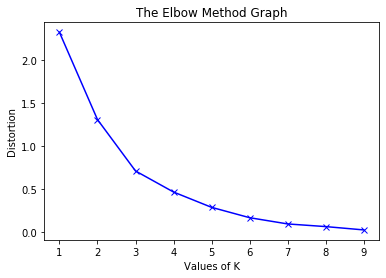

In [69]:
#And again, I will apply the Elbow Method to choose the best number of clusters for the analysis
distortions = []
mapping = {}
K_list = range(1, 10)
 
for k in K_list:
    kmean_municipality = KMeans(n_clusters=k).fit(municipality_merged)
 
    distortions.append(sum(np.min(cdist(municipality_merged, kmean_municipality.cluster_centers_,
                                        'euclidean'), axis=1)) / municipality_merged.shape[0])
 
    mapping[k] = sum(np.min(cdist(municipality_merged, kmean_municipality.cluster_centers_,
                                   'euclidean'), axis=1)) / municipality_merged.shape[0]
plt.plot(K_list, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method Graph')
plt.show()

We still get an optimum value of __4__ as the number of clusters to be used in KMeans Clustering.

In [70]:
#building the model
k_clusters=4
kmeans_municipality = KMeans(n_clusters=k_clusters, random_state=42).fit(municipality_merged)
kmeans_municipality.labels_

array([3, 0, 3, 2, 1, 1, 3, 0, 0, 3], dtype=int32)

In [71]:
#After building the model, I will insert the new cluster labels into the Dataframe
places_merged.insert(0, 'Cluster Labels', kmeans_municipality.labels_)
places_merged.head()

,Cluster Labels,Number of Bars,Number of Schools,Bars Incidence,Schools Incidence
Province,,,,,
Arezzo,3,117,18,3.616950,0.556454
Firenze,0,243,47,6.934278,1.341198
Grosseto,3,167,16,3.771633,0.361354
Livorno,2,153,10,12.675111,0.828439
Lucca,1,138,11,7.903916,0.630022


In [72]:
#resetting the index so that 'Province column' becomes accessible again
places_merged.reset_index(inplace=True)
places_merged.head()

,Province,Cluster Labels,Number of Bars,Number of Schools,Bars Incidence,Schools Incidence
0,Arezzo,3,117,18,3.616950,0.556454
1,Firenze,0,243,47,6.934278,1.341198
2,Grosseto,3,167,16,3.771633,0.361354
3,Livorno,2,153,10,12.675111,0.828439
4,Lucca,1,138,11,7.903916,0.630022


In [73]:
#mapping the new clusters

geolocator = Nominatim(user_agent='foursquare_agent')
tuscany_location = geolocator.geocode('Tuscany, Italy')
tuscany_lat = tuscany_location.latitude
tuscany_lng = tuscany_location.longitude

map_clusters = folium.Map(location=[tuscany_lat, tuscany_lng], zoom_start=8)
x = np.arange(k_clusters)
ys = [i + x + (i*x)**2 for i in range(k_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(provinces_lat, provinces_lng, 
                                  places_merged['Province'], places_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

A more detailed description of the outcome of the clusters' analysis is provided in the Report.

#### Cluster 0 - High School Density & Medium Café Density
This cluster includes Firenze, Pistoia and Prato, that report a high Schools' Incidence, and a medium value of bars incidence. Therefore, we would classify it as a School-Dense Cluster.

In [74]:
places_merged.loc[places_merged['Cluster Labels'] == 0, places_merged.columns[[1] + list(range(0, places_merged.shape[1]))]]

,Cluster Labels,Province,Cluster Labels,Number of Bars,Number of Schools,Bars Incidence,Schools Incidence
1,0,Firenze,0,243,47,6.934278,1.341198
7,0,Pistoia,0,53,11,5.529069,1.147543
8,0,Prato,0,19,5,5.216198,1.372684


#### Cluster 1 - Medium School Density & High Café Density
Lucca and Massa-Carrara belong to this group. They present a medium incidence of schools on the Province territory and a high café density. 

In [75]:
places_merged.loc[places_merged['Cluster Labels'] == 1, places_merged.columns[[1] + list(range(0, places_merged.shape[1]))]]

,Cluster Labels,Province,Cluster Labels,Number of Bars,Number of Schools,Bars Incidence,Schools Incidence
4,1,Lucca,1,138,11,7.903916,0.630022
5,1,Massa-Carrara,1,104,13,9.049223,1.131153


#### Cluster 2 - Medium School Density & Very High Café Density
Livorno mirrors a different situation. While the schools' incidence is average, its cafés' incidence is the highest among Tuscany cities.

In [76]:
places_merged.loc[places_merged['Cluster Labels'] == 2, places_merged.columns[[1] + list(range(0, places_merged.shape[1]))]]

,Cluster Labels,Province,Cluster Labels,Number of Bars,Number of Schools,Bars Incidence,Schools Incidence
3,2,Livorno,2,153,10,12.675111,0.828439


#### Cluster 3 - Low School Density & Low Café Density
Arezzo, Grosseto, Pisa and Siena are included in this cluster. These cities are described by a low school density and a low bar incidence.

In [77]:
places_merged.loc[places_merged['Cluster Labels'] == 3, places_merged.columns[[1] + list(range(0, places_merged.shape[1]))]]

,Cluster Labels,Province,Cluster Labels,Number of Bars,Number of Schools,Bars Incidence,Schools Incidence
0,3,Arezzo,3,117,18,3.616950,0.556454
2,3,Grosseto,3,167,16,3.771633,0.361354
6,3,Pisa,3,104,22,4.270661,0.903409
9,3,Siena,3,155,13,4.047378,0.339457


## 5. The Final Model

Now, I will merge all the data that I have generated into a single dataframe, to perform a final clustering based both on demographic and on environmental factors, to assess the cities' risk of finding themselves in a more difficult situation to cope with regarding COVID-19.

In [78]:
final_df = province_merged
final_df.index = final_df['Province']
places_merged.index = places_merged['Province']
final_df.drop('Province', axis=1, inplace=True)
final_df = final_df.join(places_merged[['Number of Bars', 'Number of Schools',
                                        'Bars Incidence', 'Schools Incidence']], on='Province')
final_df.drop('Cluster Labels', axis=1, inplace=True)
final_df.head()

,Lethality,Old Age Index,Population Density,Male Fraction,Positives Fraction,Number of Bars,Number of Schools,Bars Incidence,Schools Incidence
Province,,,,,,,,,
Arezzo,3.901600,211.187104,107.144248,48.081434,4.809182,117,18,3.616950,0.556454
Firenze,7.146323,205.592951,288.072756,47.689455,4.810590,243,47,6.934278,1.341198
Grosseto,3.478024,251.105018,50.736146,47.534153,2.847998,167,16,3.771633,0.361354
Livorno,6.946742,233.979879,281.740384,47.258635,4.001047,153,10,12.675111,0.828439
Lucca,6.313698,218.922393,225.385316,47.715722,4.769056,138,11,7.903916,0.630022


Now, I have to choose the more proper features for the final clustering. I will pick those that are more representative of the problem, avoiding the use of redundant characteristics. In fact, we are clustering only 10 cities and we shall not exceed in the descriptors number while building the model.  

First, we check the correlation between variables.

In [79]:
print(final_df.corr()['Positives Fraction'].sort_values())
print(final_df.corr()['Lethality'].sort_values())

Number of Bars       -0.664645
Old Age Index        -0.636132
Number of Schools    -0.085091
Bars Incidence        0.024879
Lethality             0.490763
Male Fraction         0.637767
Population Density    0.651351
Schools Incidence     0.792076
Positives Fraction    1.000000
Name: Positives Fraction, dtype: float64
Male Fraction        -0.285520
Number of Bars       -0.042150
Number of Schools     0.093232
Old Age Index         0.195937
Population Density    0.205636
Positives Fraction    0.490763
Schools Incidence     0.642103
Bars Incidence        0.694120
Lethality             1.000000
Name: Lethality, dtype: float64


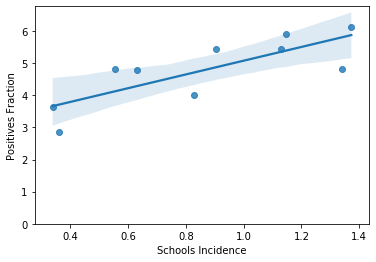

In [80]:
sns.regplot(x='Schools Incidence', y='Positives Fraction', data=final_df)
plt.ylim(0,)
plt.show()

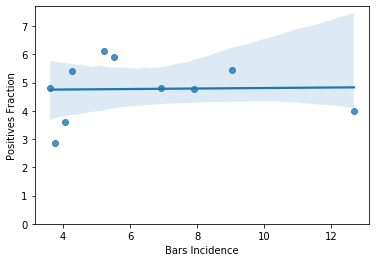

In [81]:
sns.regplot(x='Bars Incidence', y='Positives Fraction', data=final_df)
plt.ylim(0,)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

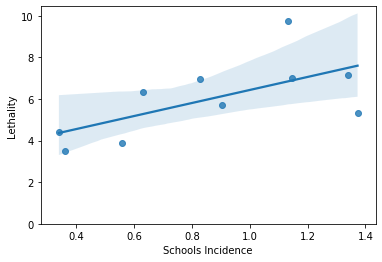

In [82]:
sns.regplot(x='Schools Incidence', y='Lethality', data=final_df)
plt.ylim(0,)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

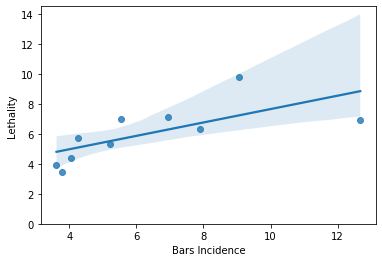

In [83]:
sns.regplot(x='Bars Incidence', y='Lethality', data=final_df)
plt.ylim(0,)
plt.show

As we can see, the schools' incidence is highly correlated with the Positives' Fraction of the Population, while the Bars' Incidence is not. By the way, the Bars' Incidence is highly correlated to the Lethality Index, and the Schools' Incidence too. On the contrary, the number of Bars is negatively correlated only with the Positives' Fraction and the Number of Schools is correlated with neither Lethality Index nor Positives' cases among the Population. For this reason, as we have already shown before, I will select only Schools' Incidence and Cafés Incidence as environmental factors.

In [84]:
final_df.drop(['Number of Bars', 'Number of Schools'], axis=1, inplace=True)

final_features = final_df[['Bars Incidence', 'Schools Incidence', 'Population Density', 
                           'Positives Fraction', 'Male Fraction', 'Lethality', 'Old Age Index']]

#Now, I will normalize the selected data
final_norm = Normalizer().fit_transform(final_features)
final_norm

array([[0.01496148, 0.00230177, 0.44320121, 0.01989314, 0.19888842,
        0.01613893, 0.87357354],
       [0.01940824, 0.00375386, 0.80628224, 0.01346428, 0.13347725,
        0.02000173, 0.57543083],
       [0.01447186, 0.00138653, 0.194676  , 0.01092785, 0.18238987,
        0.01334527, 0.96349692],
       [0.03429676, 0.00224162, 0.76234303, 0.01082617, 0.12787407,
        0.01879674, 0.63311098],
       [0.02485461, 0.00198116, 0.70874547, 0.01499675, 0.15004661,
        0.01985402, 0.68842219],
       [0.02945349, 0.00368169, 0.5649973 , 0.01774728, 0.15307556,
        0.03178531, 0.80940694],
       [0.0161931 , 0.00342546, 0.65685739, 0.02058329, 0.18483342,
        0.02161722, 0.73021233],
       [0.01490921, 0.00309436, 0.82148315, 0.01593115, 0.13064778,
        0.01882874, 0.55430714],
       [0.00723443, 0.0019038 , 0.97224256, 0.0084825 , 0.0683483 ,
        0.00739625, 0.22336135],
       [0.01759549, 0.00147575, 0.30705031, 0.01573673, 0.20595496,
        0.0191355 , 0.9

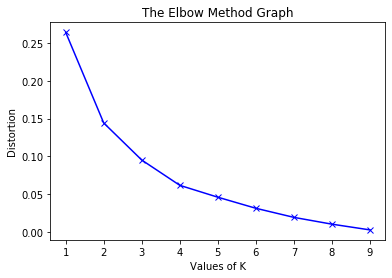

In [85]:
#final calculation of number of clusters to be used
distortions = []
mapping = {}
K_list = range(1, 10)
 
for k in K_list:
    kmean_final = KMeans(n_clusters=k).fit(final_norm)
 
    distortions.append(sum(np.min(cdist(final_norm, kmean_final.cluster_centers_,
                                        'euclidean'), axis=1)) / final_norm.shape[0])
 
    mapping[k] = sum(np.min(cdist(final_norm, kmean_final.cluster_centers_,
                                   'euclidean'), axis=1)) / final_norm.shape[0]
plt.plot(K_list, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method Graph')
plt.show()

Here, I have decided to choose __3__ as the optimal value of clusters, so that it was possible to define three classes of risk.

In [86]:
#building the model
k_clusters=3
kmeans_final = KMeans(n_clusters=k_clusters, random_state=42).fit(final_norm)
kmeans_final.labels_

array([2, 0, 2, 0, 0, 0, 0, 0, 1, 2], dtype=int32)

In [87]:
#inserting labels into the dataframe
final_df.insert(0, 'Cluster Labels', kmeans_final.labels_)
final_df.head()

,Cluster Labels,Lethality,Old Age Index,Population Density,Male Fraction,Positives Fraction,Bars Incidence,Schools Incidence
Province,,,,,,,,
Arezzo,2,3.901600,211.187104,107.144248,48.081434,4.809182,3.616950,0.556454
Firenze,0,7.146323,205.592951,288.072756,47.689455,4.810590,6.934278,1.341198
Grosseto,2,3.478024,251.105018,50.736146,47.534153,2.847998,3.771633,0.361354
Livorno,0,6.946742,233.979879,281.740384,47.258635,4.001047,12.675111,0.828439
Lucca,0,6.313698,218.922393,225.385316,47.715722,4.769056,7.903916,0.630022


In [88]:
final_df.reset_index(inplace=True)
final_df.head()

,Province,Cluster Labels,Lethality,Old Age Index,Population Density,Male Fraction,Positives Fraction,Bars Incidence,Schools Incidence
0,Arezzo,2,3.901600,211.187104,107.144248,48.081434,4.809182,3.616950,0.556454
1,Firenze,0,7.146323,205.592951,288.072756,47.689455,4.810590,6.934278,1.341198
2,Grosseto,2,3.478024,251.105018,50.736146,47.534153,2.847998,3.771633,0.361354
3,Livorno,0,6.946742,233.979879,281.740384,47.258635,4.001047,12.675111,0.828439
4,Lucca,0,6.313698,218.922393,225.385316,47.715722,4.769056,7.903916,0.630022


Finally, I will map the clusters and assign a level of risk to each Province, based on its characteristics.

In [89]:
geolocator = Nominatim(user_agent='foursquare_agent')
tuscany_location = geolocator.geocode('Tuscany, Italy')
tuscany_lat = tuscany_location.latitude
tuscany_lng = tuscany_location.longitude

map_clusters = folium.Map(location=[tuscany_lat, tuscany_lng], zoom_start=8)
x = np.arange(k_clusters)
ys = [i + x + (i*x)**2 for i in range(k_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(provinces_lat, provinces_lng, 
                                  final_df['Province'], final_df['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Cluster 0 - High Risk
Firenze, Livorno, Lucca, Massa-Carrara, Pisa and Pistoia represent areas of high risk. They are associated with a high Population Density, a high lethality index, population is quite old and the infected people are a good percentage of the population. In addition, they are dense with schools and comprehend a medium-large number of cafés.

In [90]:
final_df.loc[final_df['Cluster Labels'] == 0, final_df.columns[[1] + list(range(0, final_df.shape[1]))]]

,Cluster Labels,Province,Cluster Labels,Lethality,Old Age Index,Population Density,Male Fraction,Positives Fraction,Bars Incidence,Schools Incidence
1,0,Firenze,0,7.146323,205.592951,288.072756,47.689455,4.810590,6.934278,1.341198
3,0,Livorno,0,6.946742,233.979879,281.740384,47.258635,4.001047,12.675111,0.828439
4,0,Lucca,0,6.313698,218.922393,225.385316,47.715722,4.769056,7.903916,0.630022
5,0,Massa-Carrara,0,9.765643,248.680297,173.588452,47.030576,5.452632,9.049223,1.131153
6,0,Pisa,0,5.701183,192.581426,173.235272,48.746758,5.428501,4.270661,0.903409
7,0,Pistoia,0,6.982625,205.564449,304.646505,48.450646,5.908056,5.529069,1.147543


#### Cluster 1 - Potential Very High Risk
Prato was considered of variable risk based on demographic factors. Here, it is presented as the most at risk Tuscany city, because it also presents the larger schools incidence, which is strongly correlated with the number of infected people.

In [91]:
final_df.loc[final_df['Cluster Labels'] == 1, final_df.columns[[1] + list(range(0, final_df.shape[1]))]]

,Cluster Labels,Province,Cluster Labels,Lethality,Old Age Index,Population Density,Male Fraction,Positives Fraction,Bars Incidence,Schools Incidence
8,1,Prato,1,5.332871,161.048908,701.010295,49.280771,6.116087,5.216198,1.372684


#### Cluster 2 - Low Risk
This last cluster includes Arezzo, Grosseto and Siena, the safest cities. In fact, their Lethality Index and Positives' Fraction is low, are low-densely populated and therefore the incidence of cafés and schools is also quite low, denoting an inferior need of COVID-19 restriction measures.

In [92]:
final_df.loc[final_df['Cluster Labels'] == 2, final_df.columns[[1] + list(range(0, final_df.shape[1]))]]

,Cluster Labels,Province,Cluster Labels,Lethality,Old Age Index,Population Density,Male Fraction,Positives Fraction,Bars Incidence,Schools Incidence
0,2,Arezzo,2,3.901600,211.187104,107.144248,48.081434,4.809182,3.616950,0.556454
2,2,Grosseto,2,3.478024,251.105018,50.736146,47.534153,2.847998,3.771633,0.361354
9,2,Siena,2,4.401619,213.609758,70.628832,47.374512,3.619821,4.047378,0.339457
